In [1]:
%matplotlib inline

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from networkx import *


In [3]:

#G=nx.Graph()
n=4


def criar(n):
    G=nx.Graph()
    for i in range(n**2-2):
        G.add_node(i)
    return G

    

In [4]:
G=criar(4)

In [5]:
p=1/n
x=-1.00
y=1.00
pos={}
pos[0]=[x,y]
for i in range(1,n*n):
  #  pos[i]=[x,y]
    x=x+p
    print(i % n)
    if i % n == 0:
        x=-1.00
        y=y-p
        
    pos[i]=[x,y]
print(pos)
type(pos)

1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
{0: [-1.0, 1.0], 1: [-0.75, 1.0], 2: [-0.5, 1.0], 3: [-0.25, 1.0], 4: [-1.0, 0.75], 5: [-0.75, 0.75], 6: [-0.5, 0.75], 7: [-0.25, 0.75], 8: [-1.0, 0.5], 9: [-0.75, 0.5], 10: [-0.5, 0.5], 11: [-0.25, 0.5], 12: [-1.0, 0.25], 13: [-0.75, 0.25], 14: [-0.5, 0.25], 15: [-0.25, 0.25]}


dict

In [6]:
len(G.nodes)

14

In [7]:
def borda_esquerda(valor,n):
    if valor % n == 0:
        return True
    else:
        return False
    
def borda_direita(valor,n):
    if valor % n== n-1:
        return True 
    else:
        return False

def borda_superior(valor,n):
    if valor - n <0:
        return True
    else:
        return False

def borda_inferior(valor,n):
    if valor + n > n**2-1:
        return True
    else:
        return False

    
    





In [8]:



for i in range(0,n**2-1):
    if borda_superior(i,n):
        if borda_direita(i,n):
            G.add_edge(i,i+(n**2-n)) #cima
            G.add_edge(i,i-1)         #esquerda
            G.add_edge(i,i-(n-1))#direita
            G.add_edge(i,i+n)#baixo

        elif borda_esquerda(i,n): 
            G.add_edge(i,i+(n**2-n))#cima
            G.add_edge(i,i+(n-1))  #esquerda
            G.add_edge(i,i+1)  #direita
            G.add_edge(i,i+n) #baixo
        else:
            G.add_edge(i,i+(n**2-n))
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i+n)

    elif borda_inferior(i,n):
        if borda_direita(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i-(n-1))
            G.add_edge(i,i-1)
            G.add_edge(i,i-(n**2-n))
        elif borda_esquerda(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i+(n-1))
            G.add_edge(i,i+1)
            G.add_edge(i,i-(n**2-n)) 
        else:
            G.add_edge(i,i-n)
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i-(n**2-n)) 

    else:
        if borda_direita(i,n):
            G.add_edge(i,i-n)
            G.add_edge(i,i-(n-1))
            G.add_edge(i,i-1)
            G.add_edge(i,i+n)
        elif borda_esquerda(i,n):
            G.add_edge(i,i-n) #cima
            G.add_edge(i,i+(n-1)) #esquerda
            G.add_edge(i,i+1)#direita
            G.add_edge(i,i+n) #baixo
        else:
            G.add_edge(i,i-n)
            G.add_edge(i,i-1)
            G.add_edge(i,i+1)
            G.add_edge(i,i+n)
        
        

In [9]:
G.edges

EdgeView([(0, 12), (0, 3), (0, 1), (0, 4), (1, 13), (1, 2), (1, 5), (2, 14), (2, 3), (2, 6), (3, 15), (3, 7), (4, 7), (4, 5), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 11), (8, 11), (8, 9), (8, 12), (9, 10), (9, 13), (10, 11), (10, 14), (11, 15), (12, 15), (12, 13), (13, 14), (14, 15)])

In [10]:
for i in range(n**2):
    print(i,G[i])


    

0 {12: {}, 3: {}, 1: {}, 4: {}}
1 {0: {}, 13: {}, 2: {}, 5: {}}
2 {1: {}, 14: {}, 3: {}, 6: {}}
3 {0: {}, 2: {}, 15: {}, 7: {}}
4 {0: {}, 7: {}, 5: {}, 8: {}}
5 {1: {}, 4: {}, 6: {}, 9: {}}
6 {2: {}, 5: {}, 7: {}, 10: {}}
7 {3: {}, 4: {}, 6: {}, 11: {}}
8 {4: {}, 11: {}, 9: {}, 12: {}}
9 {5: {}, 8: {}, 10: {}, 13: {}}
10 {6: {}, 9: {}, 11: {}, 14: {}}
11 {7: {}, 8: {}, 10: {}, 15: {}}
12 {0: {}, 8: {}, 15: {}, 13: {}}
13 {1: {}, 9: {}, 12: {}, 14: {}}
14 {2: {}, 10: {}, 13: {}, 15: {}}
15 {3: {}, 11: {}, 12: {}, 14: {}}


In [11]:

estados=np.zeros(len(G),dtype=np.int)


v_map={}
for i in range(len(G)):
    v_map[i]=0
    


cmap=[]


for i in range(0,len(G)):
    cmap.append('r')
    
    
def muda_cor(mapa_cores,indice,cor_desejada):
    mapa_cores[indice]=cor_desejada
    return mapa_cores
    




muda_cor(cmap,3,'r')






['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

In [12]:
v_map[0]

0

In [13]:
nodos=list(G.nodes)

In [14]:
G[3]

AtlasView({0: {}, 2: {}, 15: {}, 7: {}})

In [15]:
list(G[2])

[1, 14, 3, 6]

In [16]:
estados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
estados[3]=1


In [18]:
print(estados)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
G[3]

AtlasView({0: {}, 2: {}, 15: {}, 7: {}})

In [20]:
list(v_map)


def paridade(G,nodo,estados):

    L=list(G[nodo])
    soma=estados[L[0]]+estados[L[1]]+estados[L[2]]+estados[L[3]]
    if soma % 2 == 0:
        return 0
    else:
        return 1
    
    


In [21]:
par= paridade(G,3,estados)

In [22]:
par

0

In [23]:

for i in range(len(v_map)):
    v_map[i]=estados[i]


In [24]:
v_map

{0: 0,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0}

In [25]:
def atualiza_cor(valores,cores):

    for i in range(len(valores)):
        if valores[i] == 0:
            muda_cor(cmap,i,'r')
        else:
            muda_cor(cmap,i,'b')
            
    return cores       

/home/andrenogueira/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


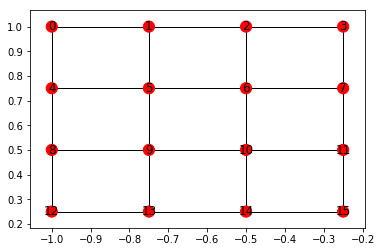

In [26]:

draw_networkx(G,node_size=125,pos=pos,periodic=True,node_color=cmap,values=v_map) #values=v_map #v_map={}

{0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}


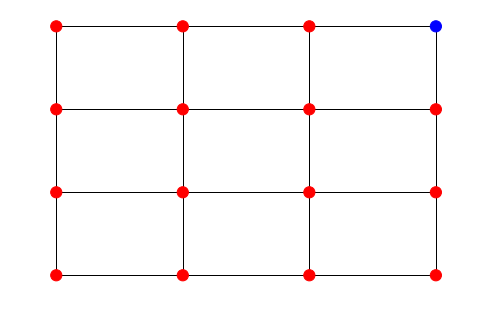

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


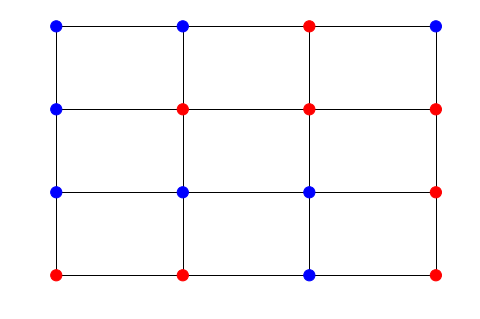

[1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0]


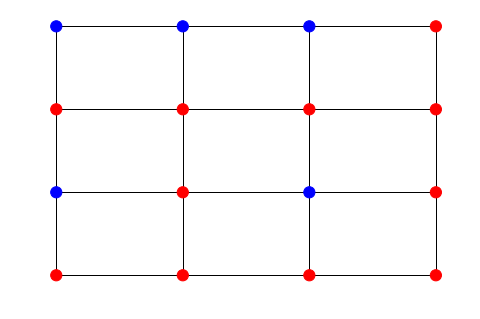

[1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0]


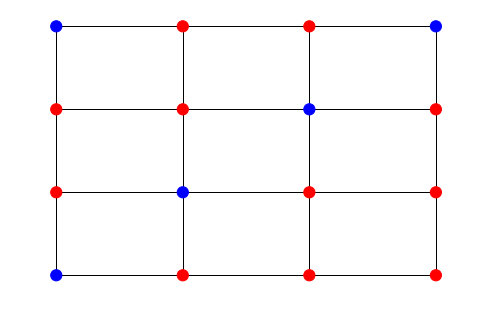

[1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0]


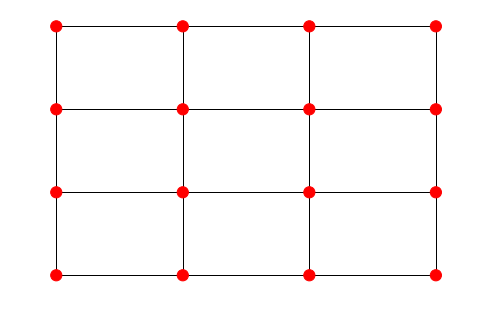

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


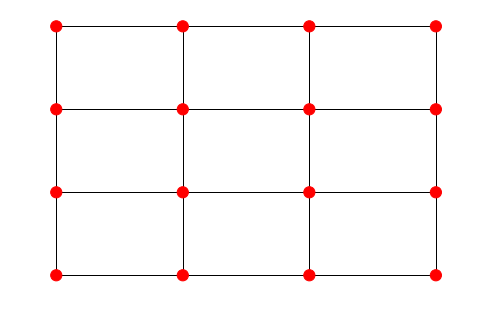

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


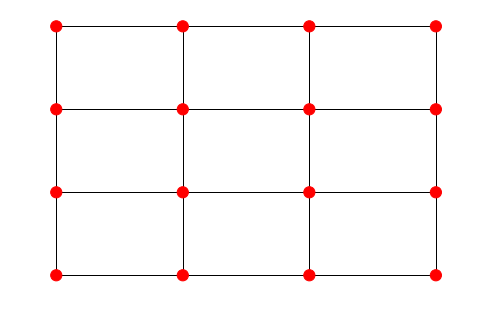

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


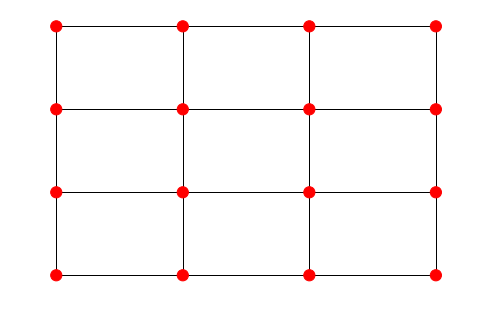

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


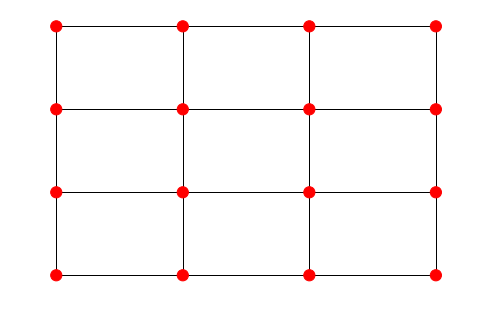

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


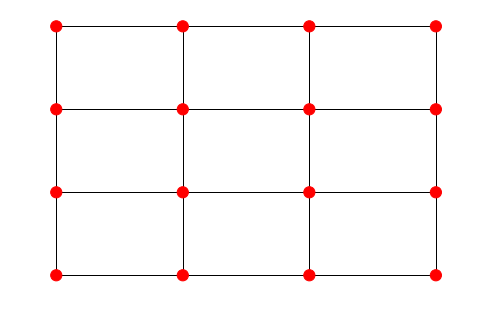

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:

estado_inicial=np.zeros(len(G),dtype=np.int)
estado_inicial[3]=1
estados1=estado_inicial

for k in range(len(v_map)):
        v_map[k]=estado_inicial[k]
#print(v_map)


  #  plt.figure(i)   
 #   draw(G,node_size=125,pos=pos,periodic=True,node_color=cmap,values=v_map)
#    plt.show()
 # print(paridade(G,i,estados1))
print(v_map)            




temp=estados1

t=10
for i in range(t):

    cmap=atualiza_cor(v_map,cmap) 
    plt.figure(i)   
    draw(G,node_size=125,pos=pos,periodic=True,node_color=cmap,values=v_map)
    plt.show()
     
    print(estados1)
    for j in range(0,len(estados1)):
        
        estados1[j]=paridade(G,j,temp)
        temp=estados1
        
        
        v_map[j]=estados1[j] 

  
  
   # cmap=atualiza_cor(v_map,cmap)  
 #   print(cmap)
  
    

In [28]:
list(G.nodes)[-3]

13

In [29]:
G.edges

EdgeView([(0, 12), (0, 3), (0, 1), (0, 4), (1, 13), (1, 2), (1, 5), (2, 14), (2, 3), (2, 6), (3, 15), (3, 7), (4, 7), (4, 5), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 11), (8, 11), (8, 9), (8, 12), (9, 10), (9, 13), (10, 11), (10, 14), (11, 15), (12, 15), (12, 13), (13, 14), (14, 15)])

In [30]:
G.edges

EdgeView([(0, 12), (0, 3), (0, 1), (0, 4), (1, 13), (1, 2), (1, 5), (2, 14), (2, 3), (2, 6), (3, 15), (3, 7), (4, 7), (4, 5), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 11), (8, 11), (8, 9), (8, 12), (9, 10), (9, 13), (10, 11), (10, 14), (11, 15), (12, 15), (12, 13), (13, 14), (14, 15)])

In [31]:
len(G)

16

In [32]:
len(G.edges)

32

In [33]:
neighbors(G,0)

In [34]:
myit=iter(G.nodes)
type(myit)

lista=list(G.nodes)
type(G.nodes)
type(lista)
print(lista)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
